In [2]:
# !pip install open3d
# !pip install ipywidgets


demo_path = "/home/tlips/bc_data/test/gello"



import os 

demos = os.listdir(demo_path)
print(demos)
demo = "0814_143343"

['0814_134805', '0814_143436', '0814_143343']


In [3]:
pickles = os.listdir(os.path.join(demo_path, demo))
# order by time
pickles.sort()

print(pickles)

pickle_path = pickles[-1]

['2024-08-14T14:33:43.873782.pkl', '2024-08-14T14:33:44.005085.pkl', '2024-08-14T14:33:44.139982.pkl', '2024-08-14T14:33:44.276701.pkl', '2024-08-14T14:33:44.407608.pkl', '2024-08-14T14:33:44.545499.pkl', '2024-08-14T14:33:44.672742.pkl', '2024-08-14T14:33:44.808555.pkl', '2024-08-14T14:33:44.939564.pkl', '2024-08-14T14:33:45.080525.pkl', '2024-08-14T14:33:45.218839.pkl', '2024-08-14T14:33:45.341694.pkl', '2024-08-14T14:33:45.472862.pkl', '2024-08-14T14:33:45.624906.pkl', '2024-08-14T14:33:45.809177.pkl', '2024-08-14T14:33:45.943742.pkl', '2024-08-14T14:33:46.084933.pkl', '2024-08-14T14:33:46.232156.pkl', '2024-08-14T14:33:46.418646.pkl', '2024-08-14T14:33:46.608538.pkl', '2024-08-14T14:33:46.740949.pkl', '2024-08-14T14:33:46.875005.pkl', '2024-08-14T14:33:47.010244.pkl', '2024-08-14T14:33:47.145398.pkl', '2024-08-14T14:33:47.281523.pkl', '2024-08-14T14:33:47.413505.pkl', '2024-08-14T14:33:47.607901.pkl', '2024-08-14T14:33:47.746522.pkl', '2024-08-14T14:33:47.877066.pkl', '2024-08-14T1

In [4]:
import pickle

obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))

In [5]:
print(obs.keys())
# for k,v in obs.items():
#     print(k)
#     print(v)

dict_keys(['left-wrist_rgb', 'left-wrist_depth', 'right-wrist_rgb', 'right-wrist_depth', 'base_rgb', 'base_depth', 'joint_positions', 'tcp_pose_rotvec', 'wrench', 'gripper_position', 'control'])


In [6]:
positions = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    pose = obs["tcp_pose_rotvec"]
    position = pose[:3]
    positions.append(position)

In [7]:
import open3d 

# jet color scheme 
import cv2
import numpy as np

# visualize the positions
pcd = open3d.geometry.PointCloud()
# encode the colors using the spectral color scheme according to time

pcd.points = open3d.utility.Vector3dVector(positions)
colors = []
for i in range(len(positions)):
    color = cv2.applyColorMap(np.array(i/len(positions)*255,dtype=np.uint8), cv2.COLORMAP_CIVIDIS)
    colors.append(color[0][0]/255)



pcd.colors = open3d.utility.Vector3dVector(colors)

# add a coordinate frame of the robot
frame = open3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0,0,0])

open3d.visualization.draw_geometries([pcd, frame])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


interactive(children=(IntSlider(value=0, description='i', max=363), Output()), _dom_classes=('widget-interact'…

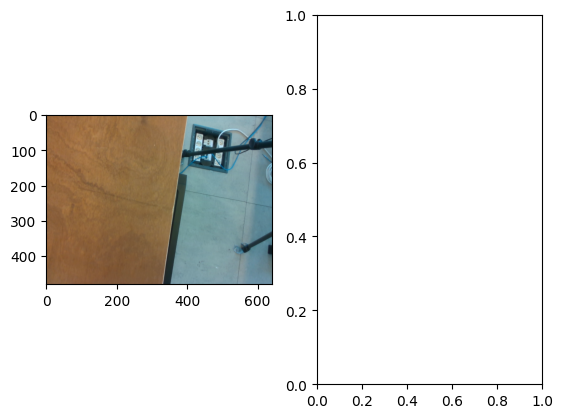

In [11]:
# get the wrist camera images and display them 
import cv2
import numpy as np
import matplotlib.pyplot as plt

wrist_images = []
base_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
#     img = obs["wrist_rgb"]
#    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.astype(np.uint8)
#     wrist_images.append(img)

    img = obs["left-wrist_rgb"]
    img = img.astype(np.uint8)
    base_images.append(img)
# create ipywidget slider to display the  numpy array images
import ipywidgets as widgets
from IPython.display import display
slider = widgets.IntSlider(min=0, max=len(base_images)-1)

def view_image(i):
    base_img = base_images[i]
    
    # display the image
    fig, ax = plt.subplots(1,2)
    #ax[0].imshow(wrist_img)
    ax[0].imshow(base_img)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)


view_image(0)
plt.show()


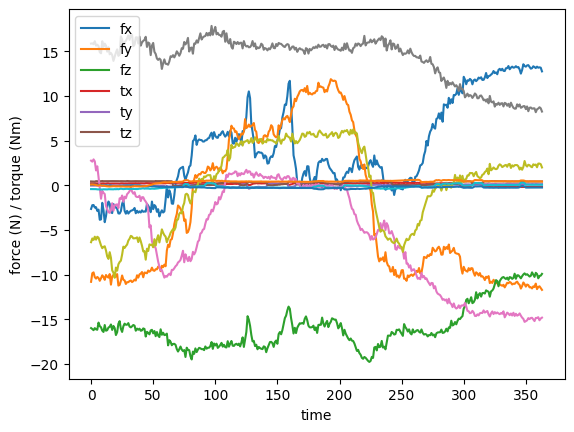

In [12]:
# visualize the FT wrench timeseries

ft_wrench = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    ft = obs["wrench"]
    ft_wrench.append(ft)


ft_wrench = np.array(ft_wrench)

# plot the timeseries
plt.plot(ft_wrench)
plt.xlabel("time")
plt.ylabel("force (N) / torque (Nm)")
plt.legend(["fx", "fy", "fz", "tx", "ty", "tz"])


In [9]:
accelerometer_z_values = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    accelerometer_z = obs["accelerometer"]
    accelerometer_z_values.append(accelerometer_z)

plt.plot(accelerometer_z_values)
plt.xlabel("time")
plt.ylabel("accelerometer z value")

KeyError: 'accelerometer'

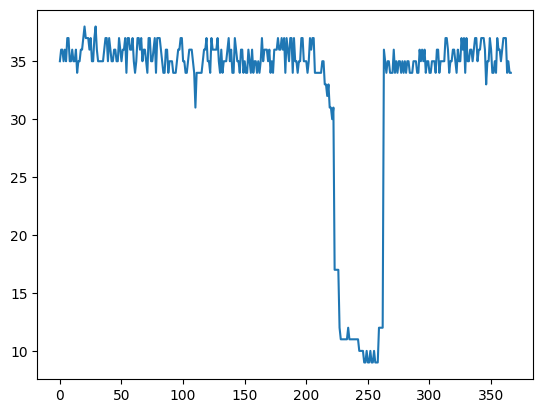

In [ ]:
# read first index of fingertips
fingertips_values = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    fingertips = obs["fingertips"]
    fingertips_values.append(fingertips[1])

plt.plot(fingertips_values)